# Visualizing Networks with Python

While Gephi is a fine-grained tool for creating explanatory visualizations, you'll often find a need for creating visualizations directly in your Python workflow, for either explanatory or exploratory purposes. NetworkX includes a [robust interface for visualizing networks with `matplotlib`](https://networkx.org/documentation/stable/reference/drawing.html). 

However, even their documentation recommends that for presentation-ready visualizations you're best off exporting your data to a tool like Gephi. A visualization in Python is mainly useful as an intermediate step, or in instance where you're visualizing something computationally complex (such as needing to create 10 or 20 iterations of the same visualization very quickly).

## Using `draw()` and `display()`

NetworkX has a detailed API for drawing graphs using the `draw()` and `draw_networkx()` functions. While these functions are useful for fine-grained work, they require a lot of additional code since each visual element needs to be coded and added as a separate parameter.

Alternatively the newer `display()` function allows you to use Graph attributes to control what the final visualization looks like. You can use the built-in Karate Club graph as an example.

In [1]:
# Necessary libraries
import networkx as nx

# Read Karate Club data as example
G = nx.karate_club_graph()
print(G)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


If called in its most basic form, the display function will try its best to create a readable visualization.

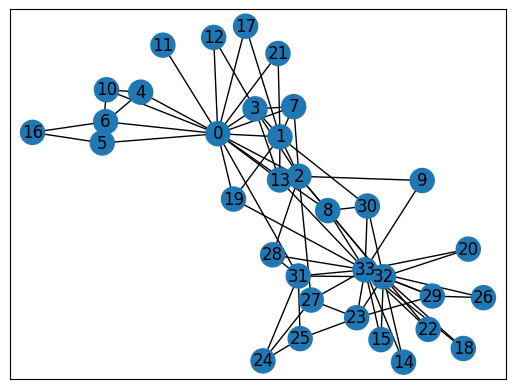

In [12]:
nx.display(G)

You can customize the visualization by adding specific attributes to your Graph object. The [documentation for `display()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.display.html) outlines which attributes can be updated and what they can control. For instance, adding a `'size'` attribute will determine the size of the nodes, and a `'width'` attribute will determine the width of the edges. Here is some code that updates some specific attributes for visualization:

In [2]:
# Create a size variable by scaling up the degree centrality of nodes
# You copuld do this with any kind of centrality
degree = nx.degree_centrality(G)
size = {k:v*2000 for k,v in degree.items()}

# Run louvain community detection
# Create louvain variable from resulting communities to use as node color
from networkx.algorithms.community import louvain_communities
louvain = louvain_communities(G, seed=42)
louvain = {g:i for i,group in enumerate(louvain) for g in group}

# Create a pos (position) variable and use store_pos_as to create a "pos" attribute
pos = nx.spring_layout(G, store_pos_as="pos")

# Add all attributes to graph
# Add size attribute to graph directly
nx.set_node_attributes(G, size, 'size')
# Add louvain attribute to graph and use apply_matplotlib_colors to
# convert the group to a matplotlib "color" attribute
nx.set_node_attributes(G, louvain, "louvain")
nx.apply_matplotlib_colors(G, "louvain", "color", "tab10")

Running `display()` again after adding these attributes will alter the appearance of the visualization.

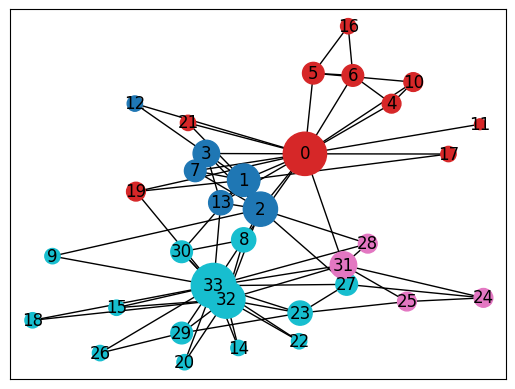

In [3]:
nx.display(G)

Instead of setting the default attributes, you can also tell `display()` which attributes to use by setting parameters within the display function. The following code will use the attributes you set above as well as some additional parameters.

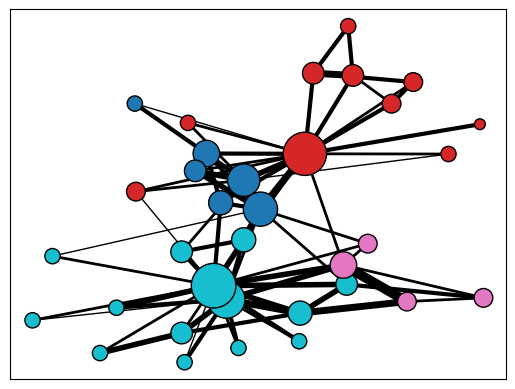

In [4]:
nx.display(G, 
           node_label=False, # Turn off the node labels, which are the names of the nodes by default
           node_border_color="black", # Set node border to a specific color
           edge_width="weight" # Set edge width to the "weight" edge attribute
          )

With a few tweaks, you can create a compelling visualization on Python, and there's always Gephi when you're ready for more fine tuning.